In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import metrics


In [2]:
def loadPrices(fn):
    global nt, nInst
    df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    nt, nInst = df.values.shape
    return (df.values)

pricesFile="./prices.txt"
prcAll = loadPrices(pricesFile)
print ("Loaded %d instruments for %d days" % (nInst, nt))

Loaded 100 instruments for 250 days


In [3]:
prcAll = pd.DataFrame(prcAll)

In [4]:
lowers, uppers = metrics.calcBollinger(prcAll.iloc[:14], 14, 1)

In [5]:
lowers.iloc[-1] > prcAll.iloc[13]

0     False
1     False
2     False
3     False
4     False
      ...  
95     True
96    False
97     True
98    False
99    False
Name: 13, Length: 100, dtype: bool

In [6]:
prcAll.shape

(250, 100)

In [7]:
prcAll = pd.DataFrame(prcAll)

In [11]:
means = prcAll.rolling(14).mean()
stds = prcAll.rolling(14).std()

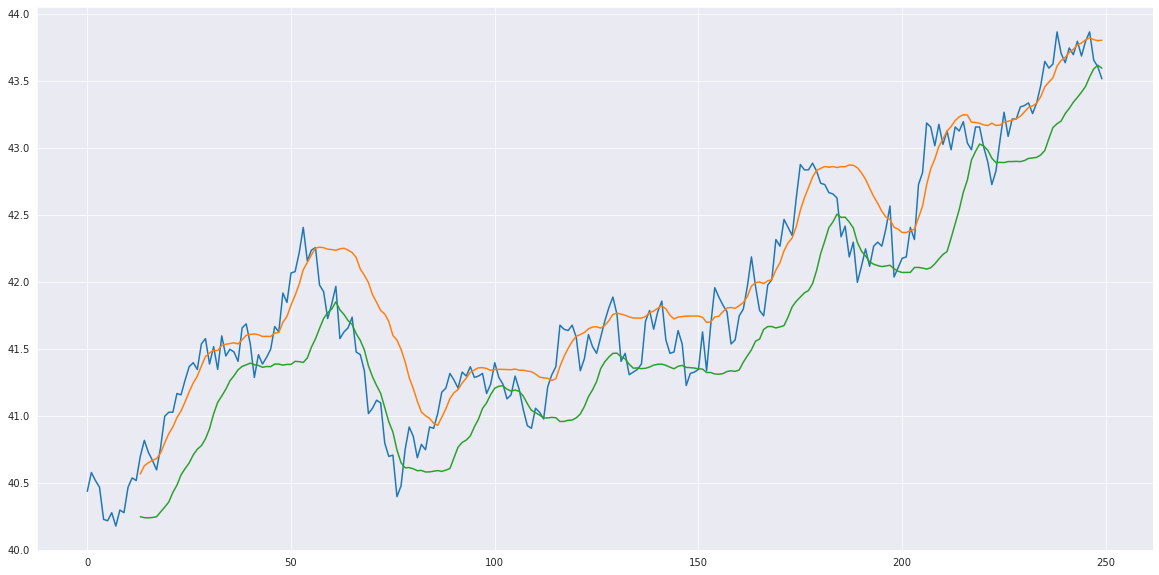

In [10]:
plt.figure(figsize=(20,10))
plt.plot(prcAll[0])
plt.plot(means[0] + stds[0])
plt.plot(means[0] - stds[0])

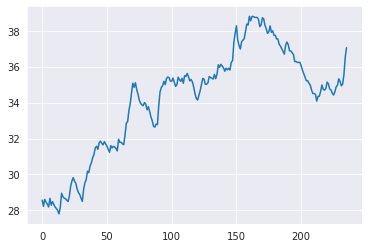

In [11]:
plt.plot(metrics.calcRSI(prcAll[6], 14))

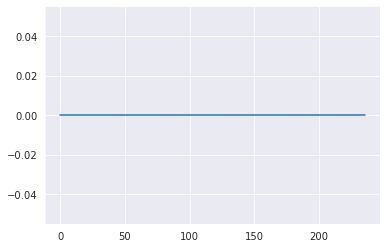

In [7]:
plt.plot(rsi[60])

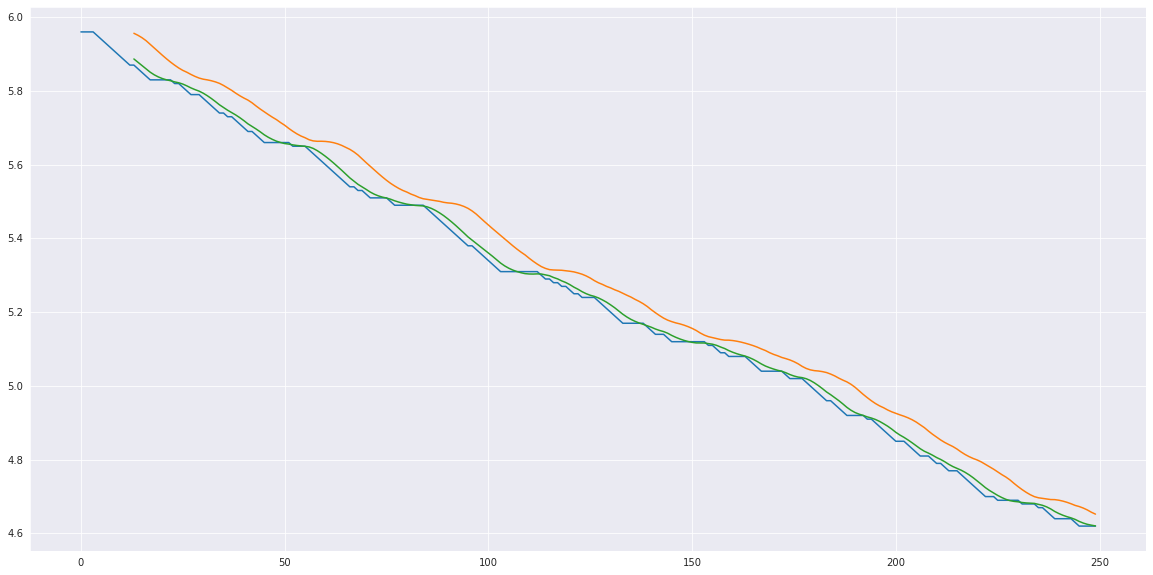

In [12]:
plt.figure(figsize=(20,10))
plt.plot(prcAll[60])
plt.plot(means[60] + stds[60])
plt.plot(means[60] - stds[60])

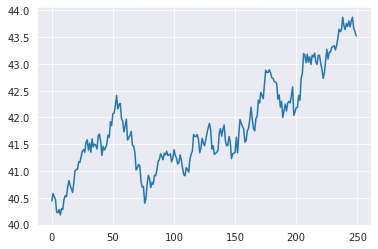

In [17]:
plt.plot(prcAll[0])

Text(0, 0.5, 'RSI')

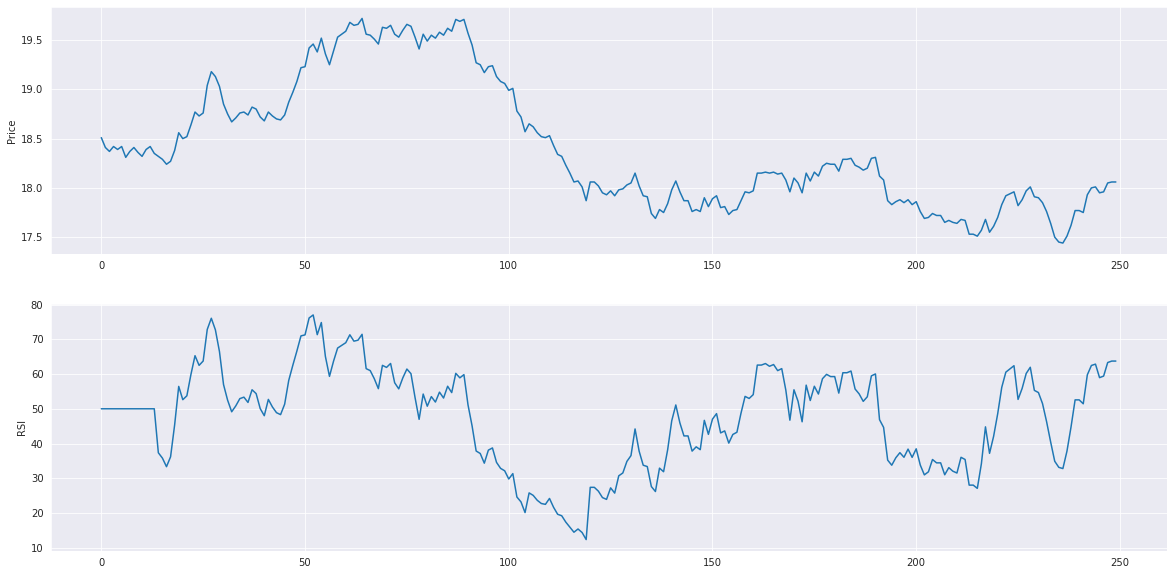

In [36]:
stockIndex = 3
fig, ax = plt.subplots(2, 1, figsize = (20, 10))
ax[0].plot(prcAll[stockIndex])
ax[0].set_ylabel("Price")
ax[1].plot(([50]*14) + list(rsi[stockIndex]))
ax[1].set_ylabel("RSI")

In [24]:
?plt.subplot

In [18]:
np.sum(rsi[0][50:] < 30)

4

In [20]:
np.sum(rsi[0][50:] > 70)

3

In [9]:
prcAll

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,40.44,4.90,30.92,18.51,47.69,61.70,54.07,18.65,44.13,49.39,...,52.30,38.38,54.80,28.49,31.98,63.15,51.62,11.12,33.32,41.10
1,40.58,4.88,30.95,18.41,47.55,61.38,54.10,18.71,43.97,49.29,...,52.48,38.37,54.78,28.40,32.18,63.15,51.69,11.15,33.35,41.35
2,40.52,4.90,31.02,18.37,47.70,62.10,54.15,18.63,44.13,49.61,...,52.08,38.40,54.82,28.33,32.04,63.16,51.68,11.16,33.31,41.82
3,40.47,4.92,30.98,18.42,47.66,62.70,54.16,18.51,44.22,49.53,...,52.13,38.41,54.83,28.28,31.70,63.19,51.74,11.14,33.70,41.86
4,40.23,4.91,30.93,18.39,48.09,63.06,54.20,18.62,44.55,49.57,...,52.76,38.39,54.80,28.48,31.59,63.19,51.81,11.14,33.76,41.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,43.80,4.13,28.54,17.95,47.41,56.23,52.21,13.96,41.87,49.42,...,48.26,37.11,53.10,26.29,26.27,61.66,50.22,9.81,33.94,38.33
246,43.87,4.13,28.56,17.96,47.11,56.81,52.22,13.81,41.94,49.35,...,48.21,37.14,53.08,26.24,25.97,61.67,50.26,9.81,34.06,38.35
247,43.66,4.14,28.59,18.05,47.13,57.05,52.28,13.84,41.73,49.24,...,48.62,37.14,53.11,26.07,25.74,61.67,50.29,9.82,33.86,38.07
248,43.61,4.14,28.64,18.06,46.72,56.97,52.39,13.86,41.70,49.28,...,48.32,37.17,53.16,26.00,25.96,61.69,50.32,9.81,34.06,39.07


In [4]:
rsi = prcAll.apply(lambda x: metrics.calcRSI(x, 14))

In [5]:
rsi

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,63.768116,50.000000,32.142857,37.333333,53.125000,76.703297,28.571429,13.186813,57.526882,43.558282,...,58.469055,17.857143,11.904762,31.791908,36.443149,20.000000,54.411765,34.285714,55.737705,63.874346
1,59.583333,44.656489,30.952381,35.791544,54.153605,81.233828,23.853211,11.854103,59.181240,49.257531,...,54.191825,16.009852,11.904762,31.791908,30.031417,18.055556,52.741228,30.528376,48.589227,55.165217
2,56.902357,38.082123,27.644493,33.321597,50.568566,81.067378,29.431001,11.397100,55.211067,53.153153,...,50.480081,14.405046,11.904762,32.246118,28.521474,16.344294,50.249116,27.305776,51.534557,62.450983
3,53.857640,34.441735,22.827819,36.167907,56.282648,68.390602,27.279086,10.465975,54.231572,51.834515,...,52.402686,13.001539,9.853609,37.614816,27.885722,13.573459,43.594075,27.305776,50.681762,57.551271
4,59.522234,40.560789,21.369712,45.375399,54.434525,69.667611,25.757920,19.866484,46.024525,52.154085,...,60.573416,13.001539,14.392064,31.556045,26.684665,12.980975,45.326952,26.494864,51.826427,58.429368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,62.635432,25.916877,23.507750,58.968896,42.586637,56.052272,32.777089,46.726516,55.561347,43.352666,...,41.452732,47.390220,33.872033,33.269413,41.972084,28.411587,35.343819,32.983090,64.506841,58.145946
232,64.396908,25.916877,27.682503,59.419835,36.454584,60.646230,34.456560,41.745499,58.385237,41.215746,...,40.950871,53.773101,31.609936,31.948884,37.278480,32.751623,40.218243,32.983090,67.051509,58.328663
233,55.885150,29.773894,33.541706,63.326320,37.104779,62.397816,43.566726,43.052994,48.440345,38.042384,...,46.654209,53.773101,38.269498,27.894825,34.127526,32.751623,43.649528,36.148528,59.406877,54.726591
234,54.053210,29.773894,41.979179,63.743954,30.267613,61.416534,55.718628,43.956088,47.203382,39.855819,...,43.354527,59.475266,47.453461,26.408831,39.403592,41.042309,46.929897,34.398774,63.845926,63.415968


In [ ]:
metrics

In [15]:
prcAll[60]

0      5.96
1      5.96
2      5.96
3      5.96
4      5.95
       ... 
245    4.62
246    4.62
247    4.62
248    4.62
249    4.62
Name: 60, Length: 250, dtype: float64

In [14]:
rsi

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,63.768116,50.000000,32.142857,37.333333,53.125000,76.703297,28.571429,13.186813,57.526882,43.558282,...,58.469055,17.857143,11.904762,31.791908,36.443149,20.000000,54.411765,34.285714,55.737705,63.874346
1,63.490748,49.630607,32.066144,37.233569,53.190325,77.047957,28.224173,13.095238,57.633686,43.949862,...,58.183411,17.729895,11.904762,31.791908,35.965528,19.866920,54.304775,34.025234,55.232272,63.253206
2,63.306298,49.084065,31.837103,37.067688,52.967819,77.036730,28.611640,13.061660,57.385127,44.247066,...,57.918059,17.603851,11.904762,31.818434,35.833679,19.734975,54.144316,33.767464,55.411031,63.721617
3,63.091435,48.724643,31.423638,37.236263,53.327472,76.100790,28.457284,12.989945,57.323027,44.174649,...,58.023397,17.478997,11.772075,32.136655,35.778189,19.475053,53.666321,33.767464,55.350465,63.327032
4,63.394603,49.099152,31.275234,37.849616,53.215957,76.173504,28.342059,13.625295,56.747124,44.197590,...,58.540245,17.478997,12.053480,31.801103,35.674112,19.410834,53.757474,33.703019,55.415752,63.383988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,58.300932,42.051158,32.996413,45.118085,50.608216,57.305795,34.933931,31.995512,50.112569,47.542239,...,51.213049,29.099855,27.342495,40.914504,41.785966,23.428750,46.319324,34.796615,53.035115,51.470364
232,58.422127,42.051158,33.191434,45.160130,50.022328,57.667166,35.024180,31.800115,50.260333,47.388714,...,51.182396,29.680396,27.241792,40.827606,41.514345,23.722559,46.549425,34.796615,53.249213,51.485082
233,57.914736,42.235402,33.483230,45.537435,50.061055,57.815621,35.563008,31.883711,49.815561,47.148315,...,51.421960,29.680396,27.643442,40.533507,41.307501,23.722559,46.721527,34.944066,52.845779,51.266378
234,57.794654,42.235402,33.966217,45.579236,49.274573,57.747794,36.532543,31.939593,49.752363,47.246096,...,51.237101,30.256940,28.306222,40.413063,41.587219,24.308993,46.893340,34.864845,53.202033,51.998104


In [22]:
prcAll[0].rolling(5)

Rolling [window=5,center=False,axis=0,method=single]

In [23]:
inst0 = prcAll[0]

In [25]:
diff0 = np.diff(inst0)

In [29]:
np.maximum(0, diff0)

array([0.14, 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.12, 0.  , 0.19, 0.07,
       0.  , 0.18, 0.12, 0.  , 0.  , 0.  , 0.17, 0.23, 0.03, 0.  , 0.14,
       0.  , 0.11, 0.1 , 0.03, 0.  , 0.19, 0.04, 0.  , 0.13, 0.  , 0.25,
       0.  , 0.05, 0.  , 0.  , 0.25, 0.03, 0.  , 0.  , 0.17, 0.  , 0.05,
       0.06, 0.17, 0.  , 0.29, 0.  , 0.22, 0.01, 0.14, 0.19, 0.  , 0.08,
       0.02, 0.  , 0.  , 0.  , 0.11, 0.13, 0.  , 0.05, 0.03, 0.08, 0.  ,
       0.  , 0.  , 0.  , 0.04, 0.06, 0.  , 0.  , 0.  , 0.01, 0.  , 0.08,
       0.27, 0.17, 0.  , 0.  , 0.1 , 0.  , 0.17, 0.  , 0.11, 0.16, 0.03,
       0.11, 0.  , 0.  , 0.12, 0.  , 0.07, 0.  , 0.01, 0.02, 0.  , 0.07,
       0.16, 0.  , 0.  , 0.  , 0.03, 0.14, 0.  , 0.  , 0.  , 0.  , 0.15,
       0.  , 0.  , 0.24, 0.09, 0.06, 0.31, 0.  , 0.  , 0.04, 0.  , 0.  ,
       0.09, 0.18, 0.  , 0.  , 0.12, 0.12, 0.1 , 0.08, 0.  , 0.  , 0.06,
       0.  , 0.02, 0.02, 0.04, 0.32, 0.08, 0.  , 0.13, 0.08, 0.  , 0.  ,
       0.01, 0.16, 0.  , 0.  , 0.09, 0.01, 0.02, 0.